# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].count()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mousedupes = combined_mouse_df.loc[combined_mouse_df.duplicated(['Mouse ID','Timepoint']), 'Mouse ID'].unique()
mousedupes

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mousedupes = combined_mouse_df[combined_mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
mousedupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_df = combined_mouse_df[combined_mouse_df["Mouse ID"] != "g989"]
cleaned_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mouse_stats = cleaned_mouse_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
means = mouse_stats["Tumor Volume (mm3)"].mean()
variances = mouse_stats["Tumor Volume (mm3)"].var()
medians = mouse_stats["Tumor Volume (mm3)"].median()
stds = mouse_stats["Tumor Volume (mm3)"].std()
sems = mouse_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summarydf = pd.DataFrame({
    "Mean": means.values,
    "Variance": variances.values,
    "Median": medians.values,
    "Standard Deviation": stds.values,
    "SEM": sems.values
},index = means.index)
summarydf


,Mean,Variance,Median,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

mouse_stats["Tumor Volume (mm3)"].agg(["mean","var","median","std","sem"])

,mean,var,median,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111


## Bar and Pie Charts

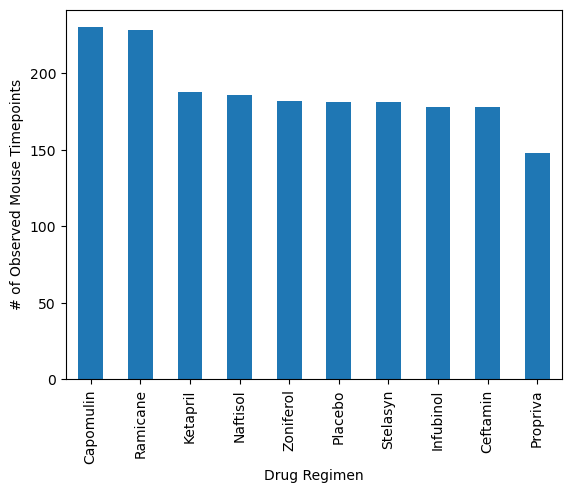

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Assign the variable
counts = cleaned_mouse_df["Drug Regimen"].value_counts()

# Configure plot and axis labels
counts.plot(kind = "bar",
        xlabel = "Drug Regimen",
        ylabel = "# of Observed Mouse Timepoints")

# Show plot
plt.show()

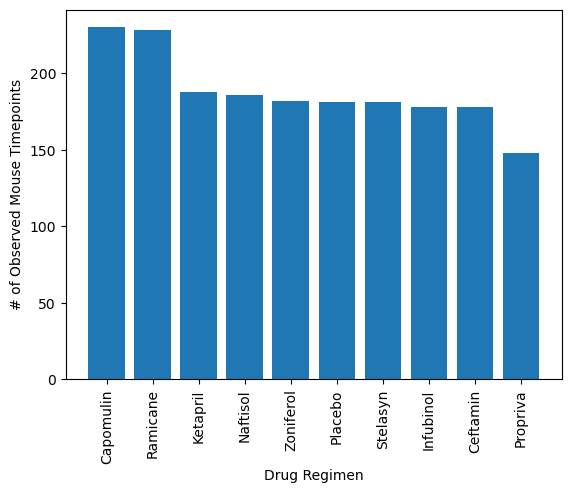

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Assign the variable
counts = cleaned_mouse_df["Drug Regimen"].value_counts()

# Configure plot and axis labels
plt.bar(counts.index.values,counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("# of Observed Mouse Timepoints")

# Show plot
plt.show()

<Axes: ylabel='Sex'>

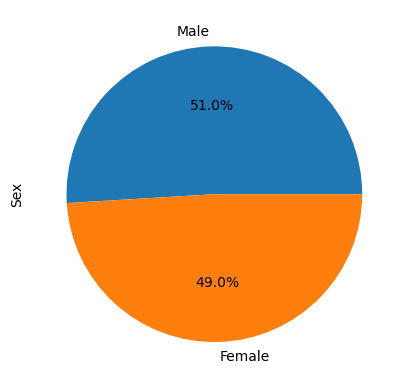

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Assign the variable
genders = cleaned_mouse_df["Sex"].value_counts()

# Labels for the sections of the pie chart
mouse_labels = ["Male", "Female"]

# Create pie chart
genders.plot(kind = "pie",
        autopct = "%1.1f%%",
        ylabel = "Sex")

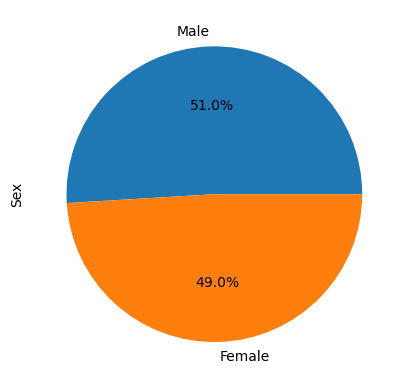

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Assign the variable
genders = cleaned_mouse_df["Sex"].value_counts()

# Labels for the sections of the pie chart and the Title 
mouse_labels = ["Male", "Female"]
plt.ylabel("Sex")

# Create pie chart
plt.pie(genders, labels=mouse_labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(cleaned_mouse_df, last_timepoint, how='right', on=["Mouse ID",'Timepoint'])

final_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

for drug in treatments:
  # Locate the rows which contain mice on each drug and get the tumor volumes  
    drug_vol = final_tumor.loc[final_tumor["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
#type(drug_vol)

# add subset
    tumor_vols.append(drug_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = drug_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = drug_vol.loc[(drug_vol<lowerbound)|(drug_vol>upperbound)]
    print(f"{drug}: {outliers}")
    

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


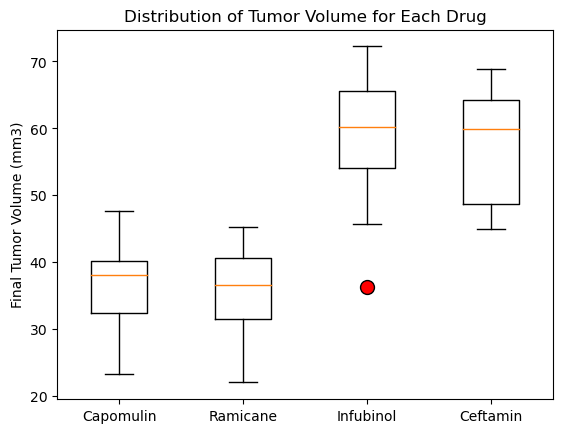

In [18]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes = tumor_vols
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot(tumor_volumes, labels=treatments, flierprops=red_dot)
plt.title('Distribution of Tumor Volume for Each Drug')
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

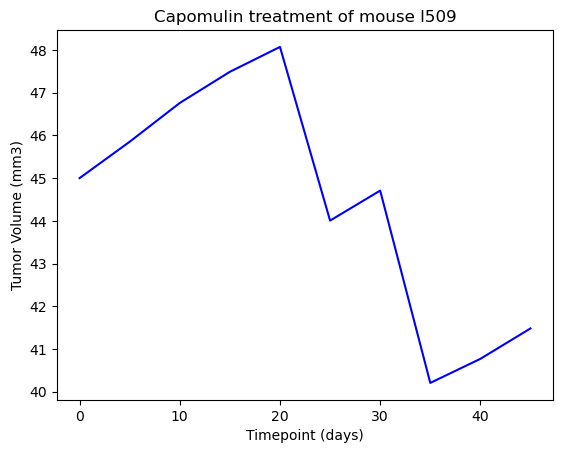

In [32]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#linegraph_df = pd.DataFrame("Mouse ID == 'l509'")
#line_df = final_tumor[(final_tumor.Mouse ID == "l509") & final_tumor.Drug Regimen == "Capomulin"]
#line_df = final_tumor.query('Mouse ID == "l509" & Drug Regimen == "Capomulin"')
#line_df = final_tumor.loc[(final_tumor.Mouse ID == "l509") & (final_tumor.Drug Regimen == "Capomulin")]

line_df = cleaned_mouse_df.loc[cleaned_mouse_df["Drug Regimen"] == "Capomulin"]
line2_df = line_df.loc[line_df["Mouse ID"] == "l509"]
line2_df.head(5)
plt.plot(line2_df["Timepoint"], line2_df["Tumor Volume (mm3)"], color="blue", label="l509")
#x-axis = 
#y-axis = 
#plt.legend(loc="best")

plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
#plt.xticks(np.arange(min(Timepoint), max(Timepoint)+1, 10.0))
plt.ylabel("Tumor Volume (mm3)")
plt.show()

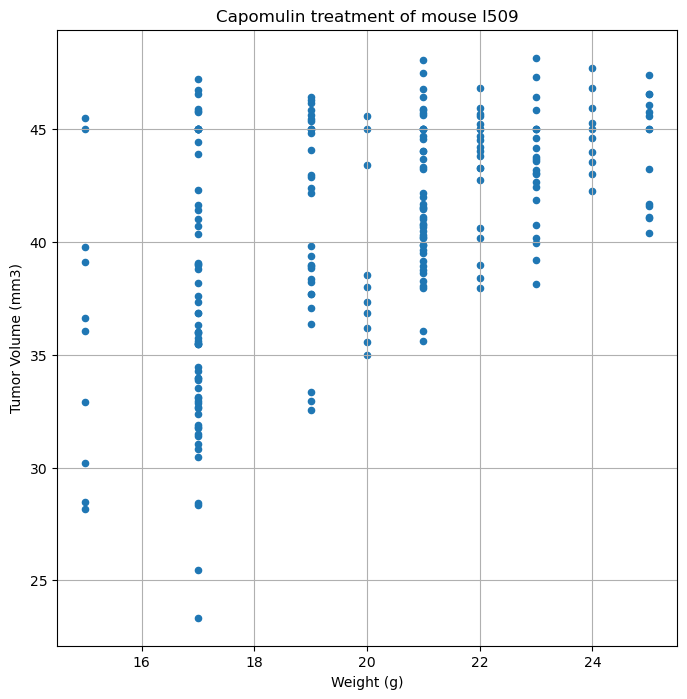

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
line_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin treatment of mouse l509")
plt.show()


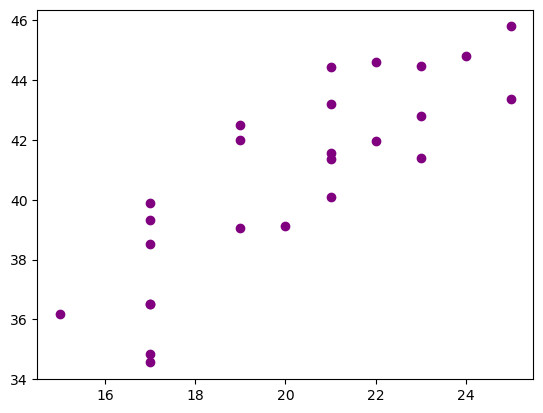

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumorvol = line_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
merge_df = pd.merge(mouse_metadata, avg_tumorvol, on= "Mouse ID")
#merge_df.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
#              title="Capomulin treatment of mouse l509")
plt.scatter(x=merge_df["Weight (g)"], y=merge_df["Tumor Volume (mm3)"], color="purple",)
plt.show()


## Correlation and Regression

The r square is 0.7088568047708724
The correlation between mouse weight and the tumor volume 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

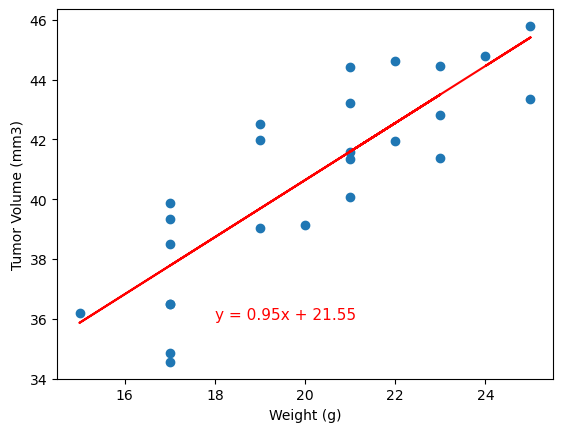

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = merge_df['Weight (g)']
y_values = merge_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r square is {rvalue**2}")
print(f"The correlation between mouse weight and the tumor volume {round(correlation[0],2)}")
#weight = merge_df.iloc[:,5]
#tumor_volume = merge_df.iloc[:,7]
correlation = st.pearsonr(x_values, y_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (18,36), fontsize=11, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#print(f"The correlation between mouse weight and the tumor volume {round(correlation[0],2)}")

